In [1]:
import psycopg2
conn = psycopg2.connect('postgresql://brosra01:@localhost/world')
cur = conn.cursor()
cur.execute('select * from country limit 10')
res = cur.fetchall()
#for row in res[:5]:
    #print(row)
    

In [2]:
import csv
import psycopg2
conn = psycopg2.connect('postgresql://brosra01:@localhost/world')
cur = conn.cursor()
x = 'USA'
cur.execute("select code, name, region, continent from country where code = '%s'" % x)
res = cur.fetchall()
#for row in res:
 #   print(row)

    
        

In [3]:
import csv
import psycopg2

with open('/home/faculty/millbr02/pub/un-general-debates.csv','r',encoding='latin-1') as data:
    csv_iter = csv.reader(data)
    db =[]
    for row in csv_iter:
        db.append(row)

In [4]:
with open('/home/faculty/millbr02/pub/un-debates-augmented-1.csv','r',encoding='latin-1') as data:
    csv_iter = csv.reader(data)
    db = []
    for row in csv_iter:
        db.append(row)
    
        

    country_codes = {}
    for line in db[1:]:
        country_codes[line[4]] = line[2]
        


        
    country_names = {}
    for line in db[1:]:
        country_names[line[4]] = 0
        
        



    newlist = []
    for line in db[1:]:
        newlist.append(line[4])


    
    matrix = {}
    for row in db[1:]:
        spkr = row[4]
        text = row[3]
        if spkr not in matrix:
            matrix[spkr] = country_names.copy()
            
            
        
        for key in matrix:
            counter = text.count(key)
            matrix[spkr][key] += counter      
        

    all_mentions = {}
    for key in matrix:
        for key2 in matrix[key]:
            if key not in all_mentions:
                all_mentions[key] = [int(matrix[key][key2])]
            else:
                all_mentions[key].append(int(matrix[key][key2]))
                

    all_count = {}        
    for key in all_mentions:
        count = sum(all_mentions[key])
        all_count[key] = count
        
        
        
#Uncomment to display information accordingly:
        
all_count
#country_codes
#country_names
#newlist
#matrix
#all_mentions
    


{'Afghanistan': 2724,
 'Albania': 2864,
 'Algeria': 1356,
 'Andorra': 442,
 'Angola': 2003,
 'Antigua and Barbuda': 915,
 'Argentina': 1628,
 'Armenia': 743,
 'Australia': 2277,
 'Austria': 1858,
 'Azerbaijan': 1257,
 'Bahamas': 1612,
 'Bahrain': 1988,
 'Bangladesh': 1335,
 'Barbados': 1581,
 'Belarus': 1355,
 'Belgium': 1226,
 'Belize': 1032,
 'Benin': 1744,
 'Bhutan': 863,
 'Bolivia': 1924,
 'Bosnia and Herzegovina': 619,
 'Botswana': 1844,
 'Brazil': 1422,
 'Brunei': 299,
 'Bulgaria': 1807,
 'Burkina Faso': 1269,
 'Burundi': 2331,
 'Cambodia': 2061,
 'Cameroon': 1189,
 'Canada': 1514,
 'Cape Verde': 856,
 'Central African Republic': 1209,
 'Chad': 2103,
 'Chile': 1619,
 'China': 2001,
 'Colombia': 1043,
 'Comoros': 1216,
 'Congo': 1610,
 'Congo, The Democratic Republic of the': 1558,
 'Costa Rica': 1383,
 'Croatia': 1132,
 'Cuba': 3161,
 'Cyprus': 2097,
 'Czech Republic': 531,
 'Czechoslovakia': 751,
 'CÃ´te dÂ\x92Ivoire': 677,
 'Democratic Yemen': 1024,
 'Denmark': 1308,
 'Djibouti

In [5]:
%matplotlib inline
import networkx as nx
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [6]:
g = nx.Graph()

In [7]:
g.add_nodes_from(matrix) 
for key in matrix: 
    for key2 in matrix[key]: 
        if matrix[key][key2] > 50:
            g.add_edge(key, key2, weight=matrix[key][key2]) 


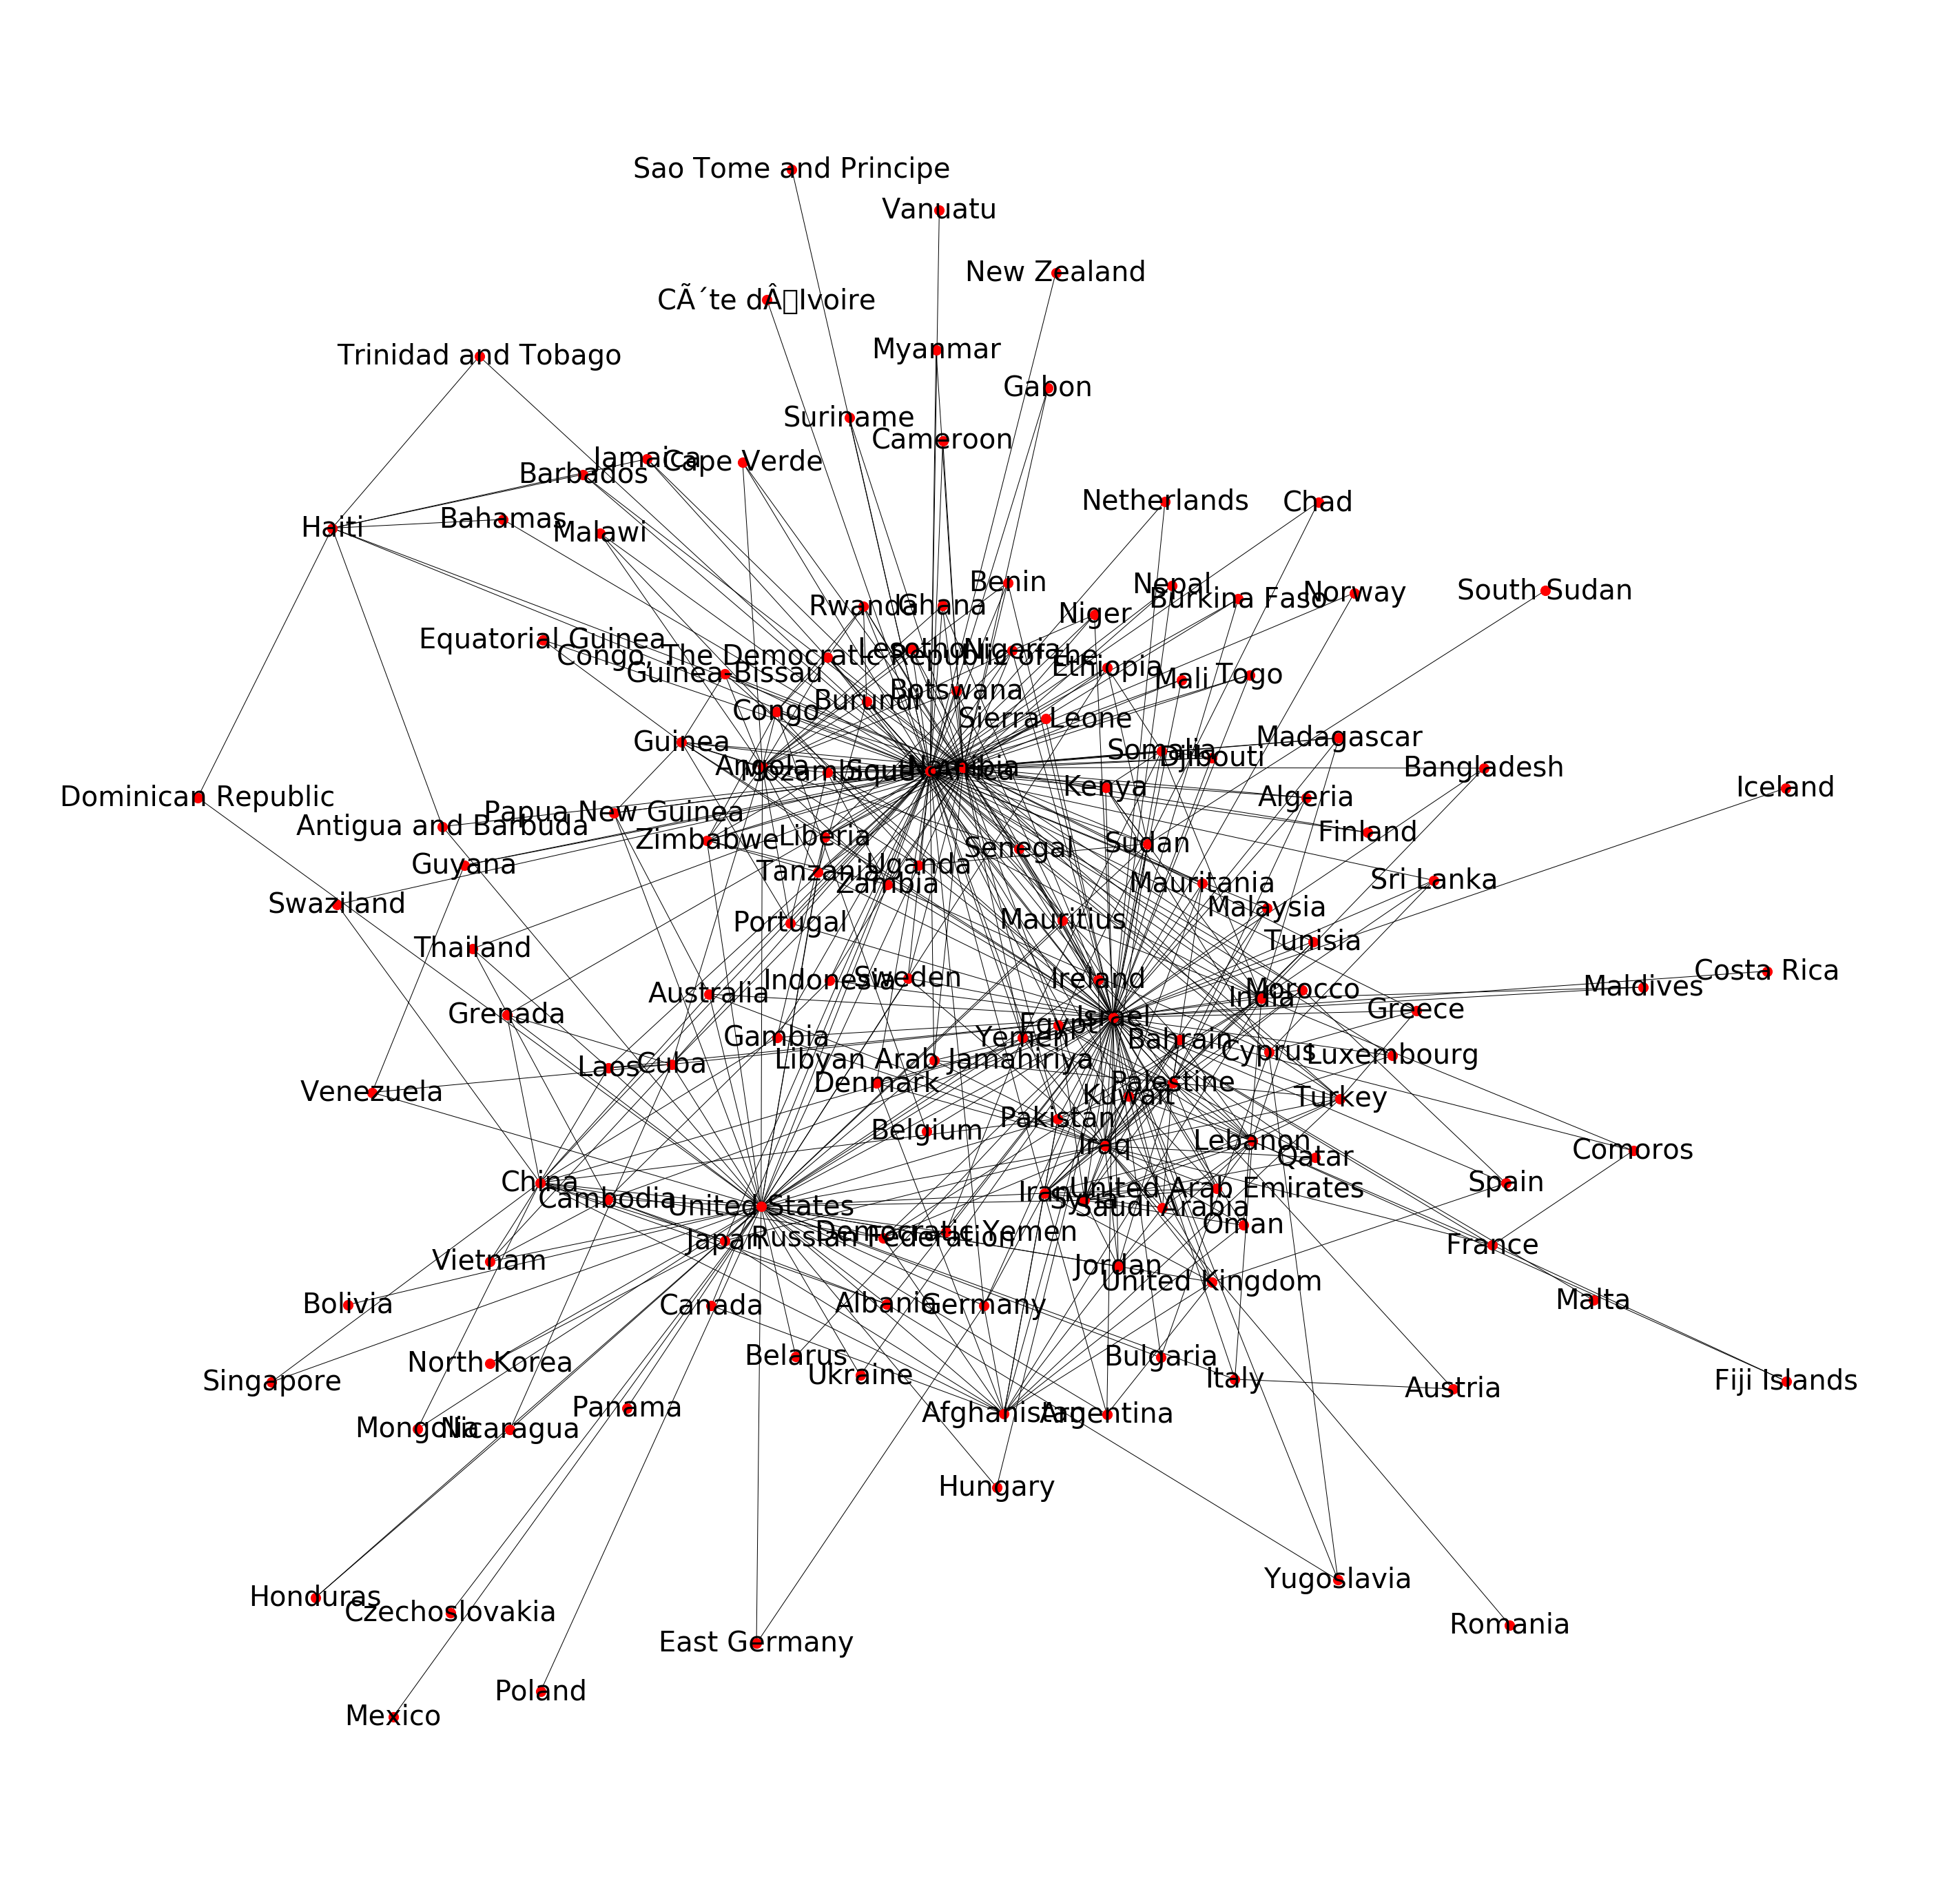

In [8]:
gfig, gax = plt.subplots(figsize = (50,50))
hego = nx.ego_graph(g,'Egypt', radius =2)
pos = nx.spring_layout(g, k=.3, iterations=2000, scale =10)
nx.draw(hego, pos, ax=gax, node_size=200, with_labels=True, font_size=40)

In [9]:
import requests

In [10]:
result = requests.get("http://localhost/~brosra01/index.html")

In [11]:
result.status_code

200

In [12]:
result

<Response [200]>

In [13]:
result = requests.get("https://opendata.socrata.com/api/views/mnkm-8ram/rows.json?accessType=DOWNLOAD")

In [14]:
j = result.json()

In [15]:
j.keys()

dict_keys(['meta', 'data'])

In [16]:
latlong = {}
for item in j['data']:
    latlong[item[10]] = {'Latitude': item[12], 'Longitude': item[13]} 

latlong



{'ABW': {'Latitude': '12.5', 'Longitude': '-69.9667'},
 'AFG': {'Latitude': '33', 'Longitude': '65'},
 'AGO': {'Latitude': '-12.5', 'Longitude': '18.5'},
 'AIA': {'Latitude': '18.25', 'Longitude': '-63.1667'},
 'ALB': {'Latitude': '41', 'Longitude': '20'},
 'AND': {'Latitude': '42.5', 'Longitude': '1.6'},
 'ANT': {'Latitude': '12.25', 'Longitude': '-68.75'},
 'ARE': {'Latitude': '24', 'Longitude': '54'},
 'ARG': {'Latitude': '-34', 'Longitude': '-64'},
 'ARM': {'Latitude': '40', 'Longitude': '45'},
 'ASM': {'Latitude': '-14.3333', 'Longitude': '-170'},
 'ATA': {'Latitude': '-90', 'Longitude': '0'},
 'ATF': {'Latitude': '-43', 'Longitude': '67'},
 'ATG': {'Latitude': '17.05', 'Longitude': '-61.8'},
 'AUS': {'Latitude': '-27', 'Longitude': '133'},
 'AUT': {'Latitude': '47.3333', 'Longitude': '13.3333'},
 'AZE': {'Latitude': '40.5', 'Longitude': '47.5'},
 'BDI': {'Latitude': '-3.5', 'Longitude': '30'},
 'BEL': {'Latitude': '50.8333', 'Longitude': '4'},
 'BEN': {'Latitude': '9.5', 'Longitu

In [23]:
import csv
import psycopg2

newlist = []

with open('/home/faculty/millbr02/pub/un-debates-augmented-1.csv','r',encoding='latin-1') as data:
    csv_iter = csv.reader(data)
    db =[]
    for row in csv_iter:
        db.append(row)
    
    for line in db:
        for key in latlong:
            if line[2] == key:
                line.insert(3, ('Latitude: ', latlong[key]['Latitude']))
                line.insert(4, ('Longitude: ', latlong[key]['Longitude']))
        for k in all_count:
            if line[6] == k:
                line.insert(6, ('UN general assembly mentions (1970 - 2008): ', str(all_count[k])))
    
    
    for line in db:
        if len(line) < 9:
            del line[3]
        del line[0]
        del line[0]
        del line[3]
        line[1] = ''.join(line[1])
        line[2] = ''.join(line[2])
        if len(line) > 3:
            line[3] = ''.join(line[3])
        newlist.append(line)
        

        
    
    checking_for_duplicates = []
    final_list = []
    for line in newlist:
        if line[0] not in checking_for_duplicates:
            checking_for_duplicates.append(line[0])
            final_list.append(line)
        else:
            pass
            
        

        
'''Each line in this list contains: 3-Letter-CountryCode, Latitude, Longitude, Count of mentions,
Country name, Region, Continent.'''



final_list[0] = ['Country code', 'Latitude', 'Longitude', 'Total mentions', 'Country name', 'Region', 'Continent']
final_list

[['Country code',
  'Latitude',
  'Longitude',
  'Total mentions',
  'Country name',
  'Region',
  'Continent'],
 ['MDV',
  'Latitude: 3.25',
  'Longitude: 73',
  'UN general assembly mentions (1970 - 2008): 1002',
  'Maldives',
  'Southern and Central Asia',
  'Asia'],
 ['FIN',
  'Latitude: 64',
  'Longitude: 26',
  'UN general assembly mentions (1970 - 2008): 1021',
  'Finland',
  'Nordic Countries',
  'Europe'],
 ['NER',
  'Latitude: 16',
  'Longitude: 8',
  'UN general assembly mentions (1970 - 2008): 1604',
  'Niger',
  'Western Africa',
  'Africa'],
 ['URY',
  'Latitude: -33',
  'Longitude: -56',
  'UN general assembly mentions (1970 - 2008): 1041',
  'Uruguay',
  'South America',
  'South America'],
 ['ZWE',
  'Latitude: -20',
  'Longitude: 30',
  'UN general assembly mentions (1970 - 2008): 1288',
  'Zimbabwe',
  'Eastern Africa',
  'Africa'],
 ['PHL',
  'Latitude: 13',
  'Longitude: 122',
  'UN general assembly mentions (1970 - 2008): 1017',
  'Philippines',
  'Southeast Asia'

In [46]:
with open('countlatlong.txt', 'w', encoding='latin-1') as data:
    for line in final_list:
        data.write(', '.join(line)+'\n')

In [47]:
with open('countlatlong.txt', 'r', encoding='latin-1') as data:
    for line in data:
        print(line)

Country code, Latitude, Longitude, Total mentions, Country name, Region, Continent

MDV, Latitude: 3.25, Longitude: 73, UN general assembly mentions (1970 - 2008): 1002, Maldives, Southern and Central Asia, Asia

FIN, Latitude: 64, Longitude: 26, UN general assembly mentions (1970 - 2008): 1021, Finland, Nordic Countries, Europe

NER, Latitude: 16, Longitude: 8, UN general assembly mentions (1970 - 2008): 1604, Niger, Western Africa, Africa

URY, Latitude: -33, Longitude: -56, UN general assembly mentions (1970 - 2008): 1041, Uruguay, South America, South America

ZWE, Latitude: -20, Longitude: 30, UN general assembly mentions (1970 - 2008): 1288, Zimbabwe, Eastern Africa, Africa

PHL, Latitude: 13, Longitude: 122, UN general assembly mentions (1970 - 2008): 1017, Philippines, Southeast Asia, Asia

SDN, Latitude: 15, Longitude: 30, UN general assembly mentions (1970 - 2008): 2267, Sudan, Northern Africa, Africa

RUS, Latitude: 60, Longitude: 100, UN general assembly mentions (1970 - 20

In [22]:
result.iter_lines()

<generator object Response.iter_lines at 0x7f6089125888>

In [21]:
#for line in result.iter_lines():
 #   print(line.decode('utf-8'))